# Time Trends Analysis

#### Provided the positive correlation between movie popularity and success*, we aim to answer the following questions:

- ROI in domestic v. foreign markets over time (Where should we market our films?)
- Worldwide ROI by genre over time (What genres should we produce for worldwide markets?)
- Popularity by genre over time among worldwide successes (Does this affirm the positive correlation between ROI and popularity?)

**See Analysis2.ipynb*

### Contents:
1. Import packages and look at dataset
2. Investigate single variable time trends
3. Where should we market our films?
4. What genres should we produce for worldwide markets?
5. Does popularity by genre over time among worldwide successes affirm the previous finding?

### 1. Import packages and look at dataset

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import datetime
import seaborn as sns
import random 

pd.set_option('display.max_columns', None)

%matplotlib inline

os.chdir('/Users/flatironschooldc3/FlatironSchoolRepo/dc-ds-111819/module-1/project/unzipped_data')
#os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data/')

In [265]:
films = pd.read_csv('films.csv')
# display(films.head())
# display(films.info())
# films.describe()

### 2. Investigate single variable time trends
#### Domestic ROI
There is a slight steady increase in domestic ROI over time. Movies are making money, and the slight increase may reflect inflation. There are clearly good years (2015) and bad years (2016).

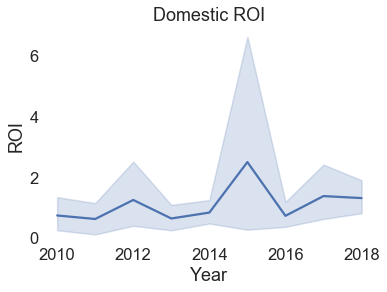

In [266]:
dr = sns.lineplot(data=films, x='year',y='domestic_roi')
dr.set(xlabel='Year', ylabel='ROI', title="Domestic ROI")

dr = plt.gcf()
plt.show()
dr.savefig('Dom_ROI.png', bbox_inches = "tight")

#### Worldwide ROI
This trend very closely mirrors that of domestic ROI. However, the worldwide ROIs are roughly 2-3x greater. This tells us that the worldwide market is significantly more profitable than the domestic market alone.

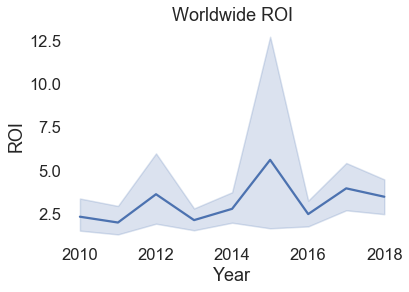

In [267]:
wr = sns.lineplot(data=films, x='year',y='worldwide_roi')
wr.set(xlabel='Year', ylabel='ROI', title="Worldwide ROI")

wr = plt.gcf()
plt.show()
wr.savefig('Wor_ROI.png', bbox_inches = "tight")

#### Production Budget
This graph is surprising because the peak ROI year in both worldwide and domestic markets (2015) also has the lowest production budget. However, other peaks (e.g. 2017) and troughs (e.g. 2011) in production budget mirror ROI values. While there may be some years of positive correlation between production budget and ROI, this is not a dependable correlation factor in the success of films.

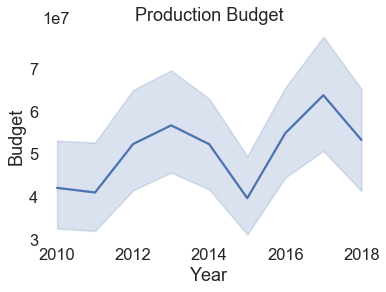

In [268]:
pb = sns.lineplot(data=films, x='year',y='production_budget')
pb.set(xlabel='Year', ylabel='Budget', title="Production Budget")

pb = plt.gcf()
plt.show()
pb.savefig('Prod_Bud.png', bbox_inches = "tight")

#### Popularity
Popularity increases dramatically over time. Interestingly, in high ROI year 2015, popularity dipped. Why is this? If popularity is a result of theater admission, how could this be? Are more people voting? Does the number of people voting mirror popularity? Do people rate more popular films as better?

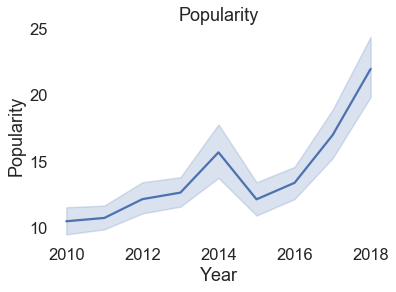

In [269]:
pop = sns.lineplot(data=films, x='year',y='popularity')
pop.set(xlabel='Year', ylabel='Popularity', title="Popularity")

pop = plt.gcf()
plt.show()
pop.savefig('Pop.png', bbox_inches = "tight")

#### Vote Counts
Number of votes has little correlation with popularity since 2015. Let's cross-reference with ratings.

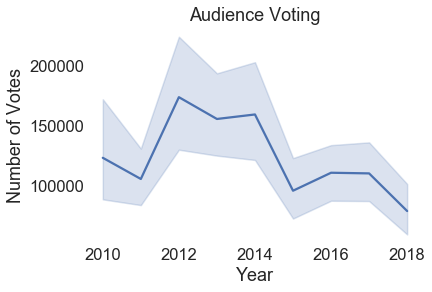

In [270]:
nv = sns.lineplot(data=films, x='year',y='numvotes')
nv.set(xlabel='Year', ylabel='Number of Votes', title="Audience Voting")

nv = plt.gcf()
plt.show()
nv.savefig('NumVotes.png', bbox_inches = "tight")

#### Average Rating
Average rating also has little correlation with popularity. However, number of votes and average rating have a strong correlation. Popularity remains a bit of a mystery variable.

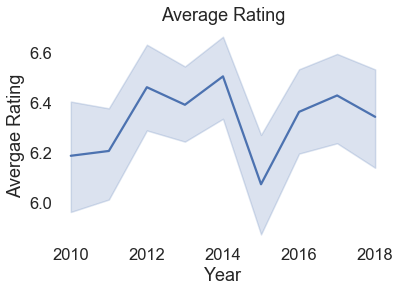

In [271]:
ar = sns.lineplot(data=films, x='year',y='averagerating')
ar.set(xlabel='Year', ylabel='Avergae Rating', title="Average Rating")

ar = plt.gcf()
plt.show()
ar.savefig('Prod_Bud.png', bbox_inches = "tight")

In [272]:
# How does everything look together?

# fig = sns.lineplot(data=pd.melt(films_yr, ['year']), x='year',y='value', hue='variable', legend='brief')
# box = fig.get_position()
# fig.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
# fig.legend(loc=0, bbox_to_anchor=(1.1, 1.1))
# plt.title("Observed Characteristics across Time")
# plt.xlabel("Year")
# plt.show()

# This graph is messy and it appears we need to subset the data to have a cleaner look.

### 3. Where should we market our films? 

In [273]:
sns.set_context("talk")

# Create function to plot relevant subsets of data together on one plot by first subetting df

# Self-tip: ax.set(xlabel='Xlabel', ylabel='Ylabel', title='Title', xlim=(xmin, xmax), ylim=(ymin, ymax))

def lineplot_melt(df, columns):
    df1=df.filter(items=['year', *columns])
    ax = sns.lineplot(data=pd.melt(df1, ['year']), x='year',y='value', hue='variable', legend='full')
    return ax

# Test function with multiple arguments:
# lineplot_melt(films, ['domestic_roi', 'worldwide_roi'])
# This works but does not allow for graph customization

#### Return on Investment in Domestic v. Worldwide Markets

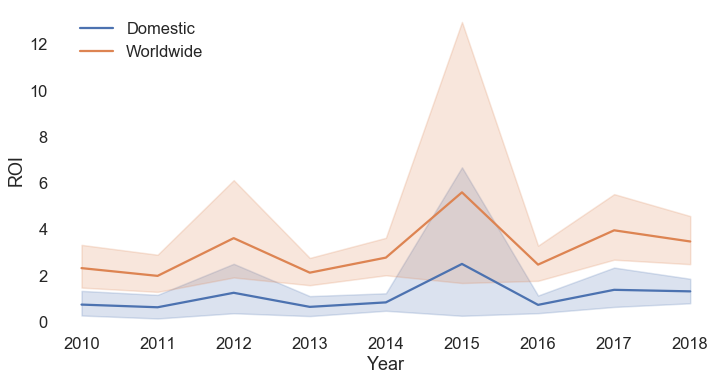

In [283]:
films_roi=films.filter(items=['year', 'domestic_roi', 'worldwide_roi'])
sns.set_style("white")
ax1 = sns.lineplot(data=pd.melt(films_roi, ['year']), x='year',y='value', hue='variable', legend='full')
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 2, box.height *1.5]) 
# ax1.set_position([box.x0, box.y0, box.width * 2, box.height / 2]) 
# ax1.set_position([0, 0, 8, 3])
mylabels = ['Domestic','Worldwide']
ax1.legend(loc=0, bbox_to_anchor=(0.25, 1), labels = mylabels, frameon=False)
ax1.set(xlabel='Year', ylabel='ROI'), #title="Returns on Investment")
# Get current figure to save after showing
ax1 = plt.gcf()
plt.show()
ax1.savefig('DvW_ROI.png', bbox_inches = "tight")

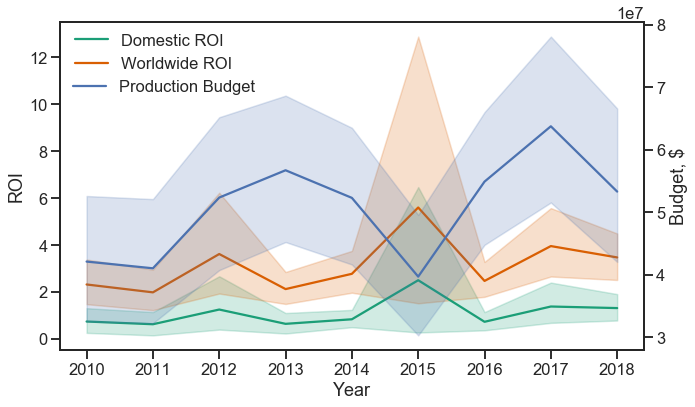

In [275]:
# Attempt to show both subplots overlaid
fig, ax1 = plt.subplots(figsize=(10,6))

# color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# ax1.plot(t, data1, color=color)
ax1 = sns.lineplot(data=pd.melt(films_roi, ['year']), x='year',y='value', hue='variable', 
                   legend='full', palette=sns.color_palette("Dark2", 2))
mylabels = ['Domestic ROI','Worldwide ROI']
ax1.legend(loc=0, bbox_to_anchor=(0.32, 1.01), labels = mylabels, frameon=False)
ax1.set(xlabel='Year', ylabel='ROI')
ax1.tick_params(axis='y')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:red'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)

ax2 = sns.lineplot(data=films, x='year',y='production_budget', palette=sns.color_palette("PRGn"))
mylabels2 = ['Production Budget']
ax2.legend(loc=0, bbox_to_anchor=(0.36, 0.87), labels = mylabels2, frameon=False)
ax2.set_ylabel('Budget, $')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig = plt.gcf()
fig.savefig('ROI_Bd.png', bbox_inches = "tight")
plt.show()
# Get current figure to save after showing


#### Production Budget

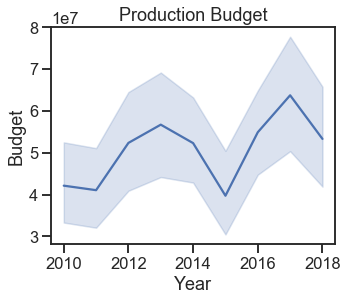

In [276]:
sns.set_style("white")
sns.set_style("ticks")

ax2 = sns.lineplot(data=films, x='year',y='production_budget')
ax2.set(xlabel='Year', ylabel='Budget', title="Production Budget")
ax2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 

ax2 = plt.gcf()
plt.show()
ax2.savefig('Prod_Bud.png', bbox_inches = "tight")

### 4. What genres should we produce for worldwide markets?

In [277]:
# Disaggregate genre
genres = set(films.genres.apply(lambda x: str(x).split(',')).sum())
for genre in genres:
    films[genre] = films.genres.str.contains(genre)*1
    films[genre] = films[genre].fillna(0)
films['rgenre'] = films['genres'].apply(lambda x: random.choice(str(x).split(",")))

# Create data subset for successful films based on worldwide ROI containing genre only
films_wr = films.loc[films['worldwide_roi'] >= 2.5]
films_wrg = films_wr.filter(items = ['year', 'History', 'Comedy', 'Drama', 'Animation', 'Sport', 'Action', 'Mystery',
                                 'Biography', 'Crime', 'Musical', 'Music', 'Sci-Fi', 'Family', 'War', 'Western',
                                 'Thriller', 'Romance', 'Adventure', 'Horror', 'Fantasy', 'Documentary'])

# Get number of films per genre per year
films_wrgy = films_wrg.groupby('year', observed=True).sum()
films_wrgy.unstack()
# Removed index not resolved, try:
films_wrgy.set_index([pd.Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]), 'History'])
films_wrgy.index.name # Returns 'year', but we cannot plot because 'year' is not recognized as a column any longer
films_wrgy = films_wrgy.rename_axis('Year').reset_index()
# films_wrgy.columns # Now returns Year
# films_wrgy.head() # Looks good

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Text(1, 1, 'Number of Movies')

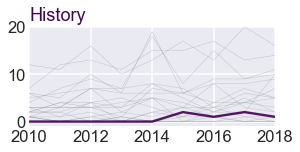

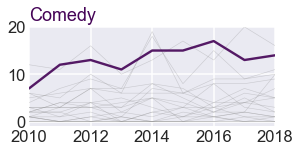

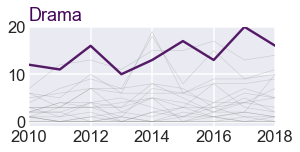

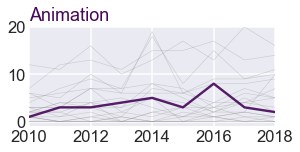

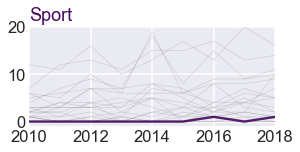

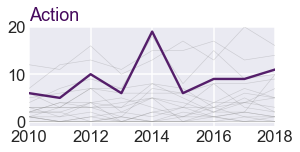

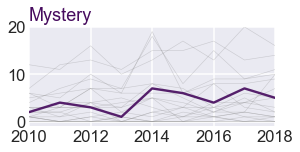

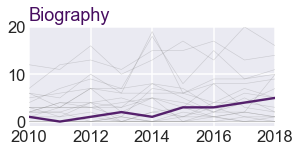

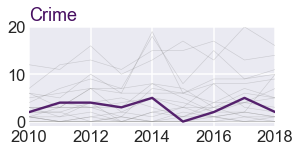

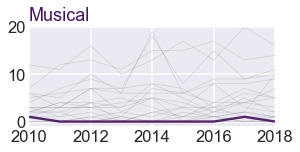

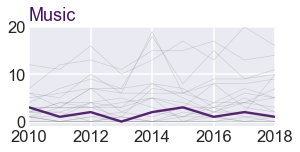

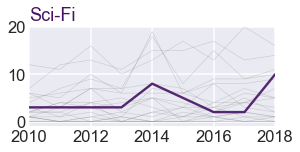

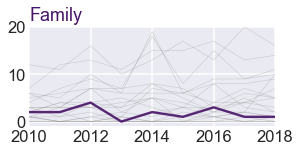

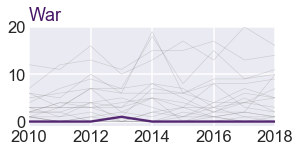

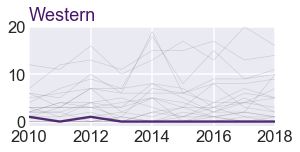

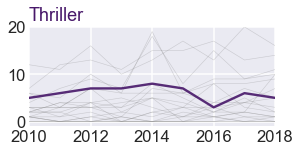

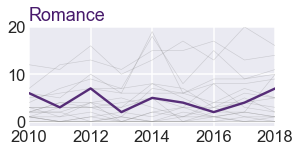

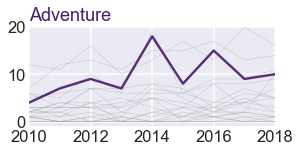

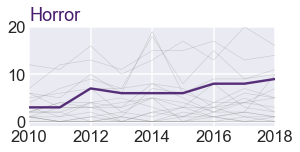

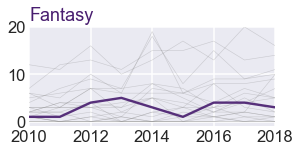

In [278]:
# Genres multiplot
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('viridis')

# multiple line plot
num=0
for column in films_wrgy.drop('Year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.figure(figsize=(15,15)) 
    plt.subplot(7, 3, num)
 
    # plot every groups, but discreet
    for v in films_wrgy.drop('Year', axis=1):
        plt.plot(films_wrgy['Year'], films_wrgy[v], color='grey', marker='', linewidth=0.6, alpha=0.3)
        # 
 
    # Plot the lineplot
    plt.plot(films_wrgy['Year'], films_wrgy[column], color=palette(num), label=column, marker='', 
             linewidth=2.4, alpha=0.9,)
#   

    # Same limits for everybody!
    plt.ylim(-1,20)
    plt.xlim(2010,2018)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', color=palette(num))
 
# general title
plt.suptitle("Genres of Movies with High Worldwide ROIs", y=1)
 
# Axis title
plt.text(1,1,'Year', ha='center', va='center')
plt.text(1,1,'Number of Movies', ha='center', va='center', rotation='vertical')



# # Attempt to plot all genres together
# ax3 = sns.lineplot(data=pd.melt(films_wr, ['year']), x='year',y='value', hue='variable', ci=None)
# box = ax3.get_position()
# # ax3.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
# ax3.legend(loc=0, bbox_to_anchor=(1.1, 1.1))
# ax3.set(xlabel='Year', ylabel='Genres', title="Genres of High Worldwide ROI Movies")

# ax3 = plt.gcf()
# plt.show()
# ax3.savefig('wr_genre.png', bbox_inches = "tight")

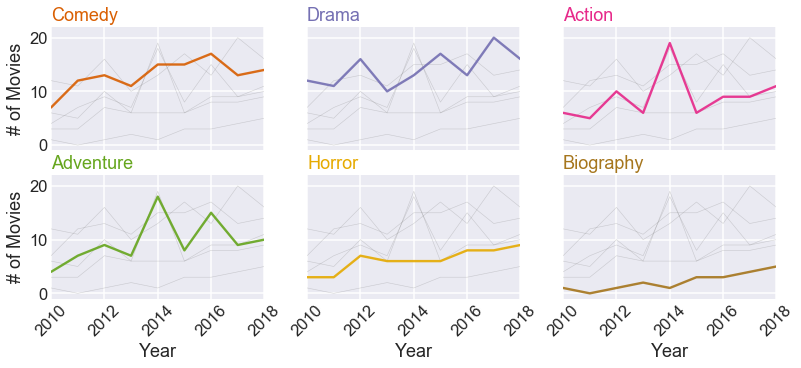

In [279]:
wrgy=films_wrgy.filter(items=['Year','Comedy','Drama', 'Action', 'Adventure','Horror', 'Biography' ])

# fig = sns.lineplot(data=pd.melt(wrgy, ['Year']), x='Year',y='value', hue='variable', legend='full', ci=None)
# box = fig.get_position()
# fig.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# # Put a legend to the right side
# fig.legend(loc=0, bbox_to_anchor=(1.8, 1))
# fig.set(xlabel='Year', ylabel='Number of Movies', ylim=(-1, 20))
# plt.show()

# Genres multiplot
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Dark2')
plt.figure(figsize=(13,5))
# multiple line plot
num=0
for column in wrgy.drop('Year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2, 3, num)
 
    # plot every groups, but discreet
    for v in wrgy.drop('Year', axis=1):
        plt.plot(wrgy['Year'], wrgy[v], color='grey', marker='', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(wrgy['Year'], wrgy[column], color=palette(num), label=column, marker='', linewidth=2.4, alpha=0.9,)

    # Same limits for everybody!
    plt.ylim(-1,22)
    plt.xlim(2010,2018)
    
    if num in [1,4] :
        plt.ylabel("# of Movies")
    if num in [4, 5, 6] :
        plt.xlabel("Year")
    #plt.suptitle("Genres of Movies with High Worldwide ROIs")
 
    # Not ticks everywhere
    plt.tick_params(axis='x', labelrotation=45)
    if num in [1,2,3] :
        plt.tick_params(axis='x', labelbottom=0, bottom=0)
    if num in [2,3,5,6] :
        plt.tick_params(axis='y', labelleft=0, left=0)
 
    # Add title
    plt.title(column, loc='left', color=palette(num))

    #plt.suptitle("Genres of Movies with High Worldwide ROIs")
    
plt.gcf()
plt.savefig('wr_genre.png', bbox_inches = "tight")
    